In [2]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [6]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check if exists missing values

In [ ]:
print("Missing values: ", churn_data.isnull().sum())

Missing values:  CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Check if exists duplicated values

In [ ]:
#see how many duplicated values exists
print("Duplicated values: ", churn_data.duplicated().sum())

Duplicated values:  0


# Check data statistics

In [ ]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Check which columns are numerical and which are categorical

In [ ]:
num_col = churn_data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)
cat_col = churn_data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: 
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [7]:
from sklearn import preprocessing

# One hot encoder to transform categorical columns to numerical

In [8]:
le = preprocessing.LabelEncoder()
for column in churn_data.columns:
    if(churn_data[column].dtypes=='object'):
        churn_data[column] = le.fit_transform(churn_data[column])
        
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## let's drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [10]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Check the distribution of te target variable (Exited) to see if it's a case of unbalanced class

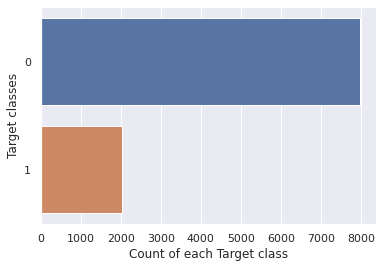

In [11]:
sns.countplot(y=churn_data.Exited ,data=churn_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Check the distribution of all the features

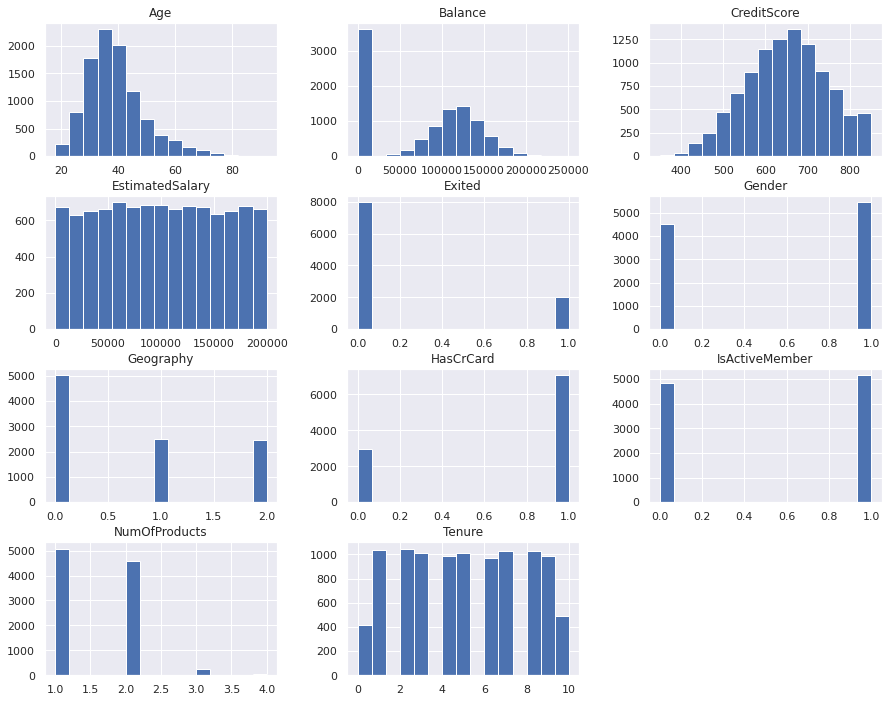

In [12]:
churn_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [14]:
from scipy import stats

# Remove the outliers according to z-score

In [15]:
churn_data_without_outliers = churn_data[(np.abs(stats.zscore(churn_data)) < 3).all(axis=1)]
churn_data_without_outliers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


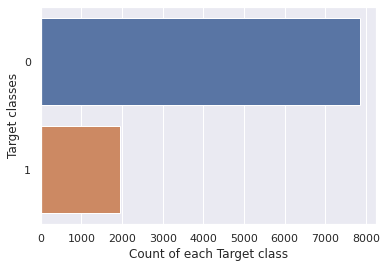

In [16]:
# Check the new distribution of the taret variable
sns.countplot(y=churn_data_without_outliers.Exited ,data=churn_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Check the multicollinearity of features by computing the correlation matrix

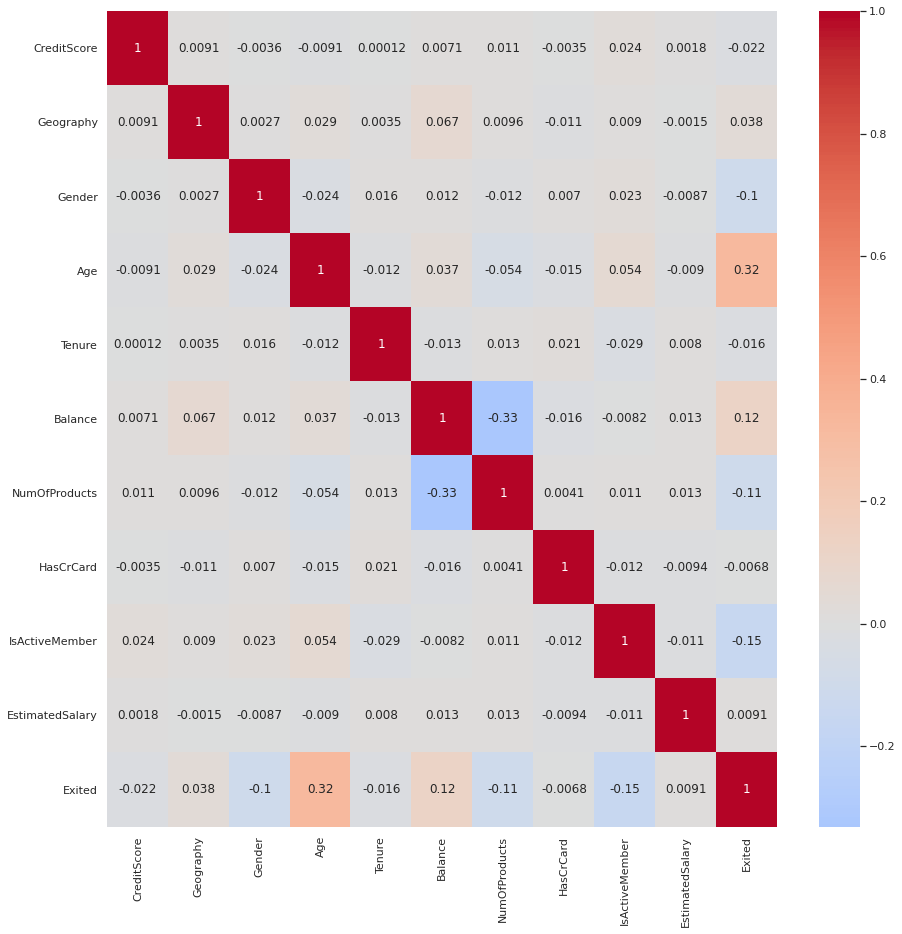

In [19]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_without_outliers.corr(), annot=True,cmap='coolwarm',center=0)

# Split the target and features of the dataset

In [52]:
X = churn_data_without_outliers.drop(['Exited'],axis=1)
y = churn_data_without_outliers.Exited

# Splitting the dataset into the 70% for Training set and 30% for Test set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling

### I scale because the dataset has variables at different scales and I don't want one independent variable dominating the other, so I scale all features in the same scale

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic model

In [55]:
# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Predicting target values by using x_test and our model:
y_pred = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)


# Checking the performance of logistic regression model
score_lr = lr.score(X_test, y_test)
print(score_lr)

0.8275510204081633


In [59]:
# Creation of confusion matrix
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)

# The statistics of precision, recall, accuracy and f1-score
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[2313   65]
 [ 442  120]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2378
           1       0.65      0.21      0.32       562

    accuracy                           0.83      2940
   macro avg       0.74      0.59      0.61      2940
weighted avg       0.80      0.83      0.79      2940



# Roc curve and AUC

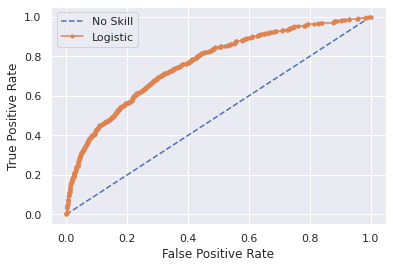

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = lr.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [61]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


# Balancing the classes using oversampling techniques

### Create a function to compute the regression

In [69]:
def compute_regression(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Defining the model
    lr = LogisticRegression()
    
    # Training the model:
    lr.fit(X_train, y_train)
    
    # Predicting target values by using x_test and our model:
    y_pred = lr.predict(X_test)
    lr_probs = lr.predict_proba(X_test)

    # Results
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
    print ('Report : ')
    print (classification_report(y_test, y_pred))

# Balancing classes using Synthetic Minority Oversampling Technique (SMOTE)

In [91]:
from imblearn.over_sampling import SMOTE, ADASYN


X = churn_data_without_outliers.drop(['Exited'], axis = 1)
y = churn_data_without_outliers.Exited
X_smote, y_smote = SMOTE(random_state = 0).fit_resample(X, y)

In [92]:
compute_regression(X_smote,y_smote)

Confusion Matrix :
[[1680  623]
 [ 681 1721]]
Accuracy Score : 0.7228480340063762
Report : 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2303
           1       0.73      0.72      0.73      2402

    accuracy                           0.72      4705
   macro avg       0.72      0.72      0.72      4705
weighted avg       0.72      0.72      0.72      4705



# Balancing classes using Adaptive Synthetic (ADASYN) 

In [95]:
X = churn_data_without_outliers.drop(['Exited'], axis = 1)
y = churn_data_without_outliers.Exited
X_ADASYN, y_ADASYN = ADASYN(random_state = 0).fit_resample(X, y)

In [96]:
compute_regression(X_ADASYN,y_ADASYN)

Confusion Matrix :
[[1680  623]
 [ 719 1684]]
Accuracy Score : 0.7148321291967701
Report : 
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      2303
           1       0.73      0.70      0.72      2403

    accuracy                           0.71      4706
   macro avg       0.72      0.72      0.71      4706
weighted avg       0.72      0.71      0.71      4706

